In [1]:
from qiskit import IBMQ
IBMQ.save_account('751b233b9debe28a2adcf09e4178bc0226c331225ab509d25835f1916b55f6b06a5619ee23c532ca46c67cf9aada4eee911b6fda77279fe1548cabd2ae455ae9')

In [2]:
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [3]:
# quantum circuit to make a Bell state 
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

# execute the quantum circuit 
backend = BasicAer.get_backend('qasm_simulator') # the device to run on
circ = bell + meas
result = execute(circ, backend, shots=1000).result()
counts  = result.get_counts(circ)
print(counts)

{'11': 507, '00': 493}


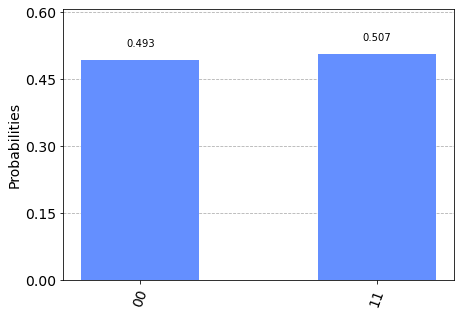

In [4]:
plot_histogram(counts)

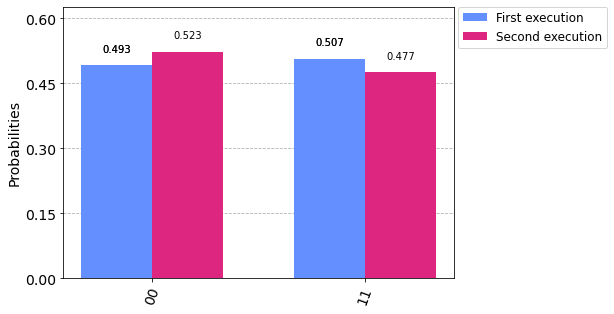

In [5]:
# Execute 2-qubit Bell state again
second_result = execute(circ, backend, shots=1000).result()
second_counts  = second_result.get_counts(circ)
# Plot results with legend
legend = ['First execution', 'Second execution']
plot_histogram([counts, second_counts], legend=legend)
